In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
folder_name = 'BI'
folder_path = os.path.join('/content/drive/My Drive', folder_name)
os.chdir(folder_path)

In [ ]:
df = pd.read_csv("wines_SPA.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Dropped Country column because all of the wine is from spain

In [ ]:
cols_to_drop = ['country']
df.drop(columns = cols_to_drop,inplace = True)
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Identified null values in year, type, body, acidity columns

In [ ]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [ ]:
df.shape

(7500, 10)

In [ ]:
#dropping the rows where year is null and acidity is null
df = df.dropna(subset=['year'])
df = df.dropna(subset=['acidity'])
print(df.shape)
print(df.isnull().sum())

(6329, 10)
winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64


Find 'unique' values in each column to look for anomalies and drop the anomalies

In [ ]:
df["year"]=df["year"].replace("N.V.",np.NaN)
df=df.dropna()
df['year'] = df['year'].astype(np.int64)
print(df.year.unique())

[2013 2018 2009 1999 1996 1998 2010 1995 2015 2011 2016 1970 1946 1962
 2019 2004 1931 1979 2005 2020 2014 1985 1929 2007 2012 2017 2008 2006
 2000 2003 2002 1991 1994 1990 1989 1987 1986 1981 2001 1968 1964 1982
 1974 1983 1955 1980 1972 1953 1958 1942 1965 1992 1973 1997 1967 1975
 1910 1961 1954 1988 1969 1951 1928 1976 1949 2021 1959 1922 1978 1925]


<ipython-input-8-a8576f9e3bbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(np.int64)


In [ ]:
df.shape

(6070, 10)

In [ ]:
print(df.rating.unique())
print(df.body.unique())
print(df.acidity.unique())
print(df.num_reviews.unique())
#there seems to be no anomalies in the above columns

[4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2]
[5. 4. 3. 2.]
[3. 2. 1.]
[   58    31  1793  1705  1309  1209  1201   926   643   630   591   454
   438   417   398   372   295   250   217   211   172   145   139   125
   118   103    87    84    79    70    69    68    56    52    50    40
    32    28    26  5266  4350  3929  3437  3164  3127  2935  2826  2765
  2480  2419  2177  1892  1199  1141   940   935   690   685   675   593
   560   543   511   476   442   425   393   347   312   308   303   300
   292   291   285   280   268   264   256   254   251   243   240   225
   220   214   205   203   196   184   173   171   137   136   134   133
   132   131   127   123   117   116   112   110   108   102   100    94
    89    82    80    74    72    67    65    64    63    60    59    57
    53    51    49    47    45    41    39    35    33    30    29    27
  6803  5938  5545  5116  4747  4685  4516  3383  3239  2416  2208  1608
  1363  1108  1015   936   840   790   700   693   595   516   41

In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Select the categorical columns for one-hot encoding
categorical_columns = ['winery', 'wine', 'region', 'type']

# Use pandas get_dummies to perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the head of the new DataFrame
print(df_encoded.head())

   year  rating  num_reviews   price  body  acidity  winery_AGE  winery_Aalto  \
0  2013     4.9           58  995.00   5.0      3.0           0             0   
1  2018     4.9           31  313.50   4.0      2.0           0             0   
2  2009     4.8         1793  324.95   5.0      3.0           0             0   
3  1999     4.8         1705  692.96   5.0      3.0           0             0   
4  1996     4.8         1309  778.06   5.0      3.0           0             0   

   winery_Abadal  winery_Abadia Retuerta  ...  type_Ribera Del Duero Red  \
0              0                       0  ...                          0   
1              0                       0  ...                          0   
2              0                       0  ...                          1   
3              0                       0  ...                          1   
4              0                       0  ...                          1   

   type_Rioja Red  type_Rioja White  type_Sauvignon Blan

In [ ]:
#Adding number labels to the categorical data

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Suppose you have a list or a NumPy array of categorical data
categorical_data = ['region', 'type', 'wine', 'winery']

# Fit the LabelEncoder on your data and transform it
df['region'] = label_encoder.fit_transform(df['region'])
df['wine'] = label_encoder.fit_transform(df['wine'])
df['winery'] = label_encoder.fit_transform(df['winery'])
df['type'] = label_encoder.fit_transform(df['type'])


# The 'encoded_data' variable now contains the encoded labels

#The LabelEncoder fits on the input data and assigns a unique integer label to each
#category found in the data. You can then use the transform method to convert your original data into its encoded form. The classes_ attribute of the LabelEncoder will provide you with the mapping between the original categories and their corresponding labels.

In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,344,607,2013,4.9,58,58,995.00,19,5.0,3.0
1,28,653,2018,4.9,31,61,313.50,18,4.0,2.0
2,366,622,2009,4.8,1793,46,324.95,11,5.0,3.0
3,366,622,1999,4.8,1705,46,692.96,11,5.0,3.0
4,366,622,1996,4.8,1309,46,778.06,11,5.0,3.0


Find correlation between variables to drop any variables with high correlation

In [ ]:
df.corr()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
winery,1.000000,-0.205883,-0.166178,-0.017197,-0.005016,0.025006,0.018154,-0.089298,0.104001,0.255655
wine,-0.205883,1.000000,-0.036589,0.039051,0.099387,0.117132,0.060671,0.141347,-0.039152,-0.182456
year,-0.166178,-0.036589,1.000000,-0.299519,0.042120,-0.112547,-0.384351,-0.010680,-0.100687,0.155387
rating,-0.017197,0.039051,-0.299519,1.000000,-0.003144,0.040206,0.551943,0.022493,0.161058,-0.085140
num_reviews,-0.005016,0.099387,0.042120,-0.003144,1.000000,0.034428,-0.045856,0.020928,0.079627,0.050742
region,0.025006,0.117132,-0.112547,0.040206,0.034428,1.000000,0.067096,0.463734,0.327776,-0.176325
price,0.018154,0.060671,-0.384351,0.551943,-0.045856,0.067096,1.000000,0.036404,0.150861,-0.030566
type,-0.089298,0.141347,-0.010680,0.022493,0.020928,0.463734,0.036404,1.000000,0.421510,-0.319898
body,0.104001,-0.039152,-0.100687,0.161058,0.079627,0.327776,0.150861,0.421510,1.000000,-0.001638
acidity,0.255655,-0.182456,0.155387,-0.085140,0.050742,-0.176325,-0.030566,-0.319898,-0.001638,1.000000


Analyse the output variable, price

In [ ]:
df['price'].describe()

count    6070.000000
mean       67.397695
std       165.514976
min         6.260000
25%        19.980000
50%        31.630000
75%        61.940000
max      3119.080000
Name: price, dtype: float64

In [ ]:
print(df['price'].value_counts())

37.90     206
18.90     204
45.00     202
17.90     201
64.50     201
         ... 
60.06       1
237.00      1
71.90       1
200.00      1
995.00      1
Name: price, Length: 1153, dtype: int64


Class imbalance observed in price data

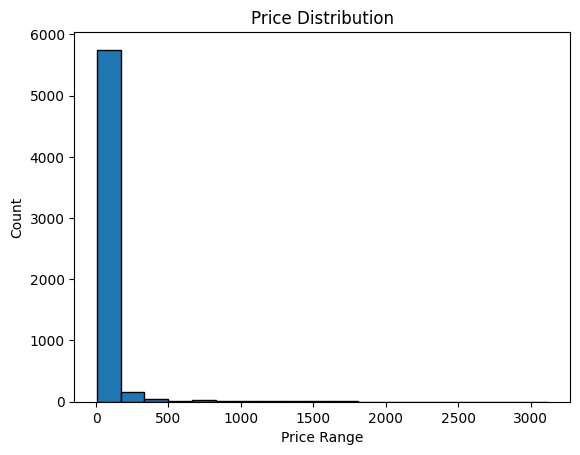

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Define the number of bins and the range of prices
num_bins = 19  # You can adjust this to set the number of bins
price_range = (df['price'].min(), df['price'].max())

# Create a histogram
plt.hist(df['price'], bins=num_bins, range=price_range, edgecolor='k')

# Add labels and a title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Price Distribution')

# Show the plot
plt.show()


We added logarithmic transformation to the price data to compress the wide range of values, making the data more suitable for analysis

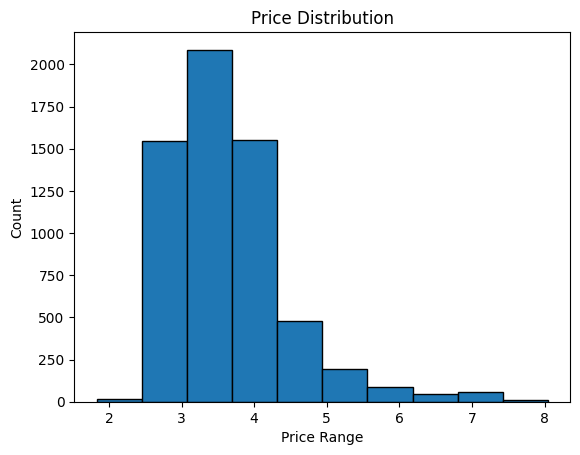

In [ ]:
df['log_price'] = np.log(df['price'])
num_bins = 10  # You can adjust this to set the number of bins
price_range = (df['log_price'].min(), df['log_price'].max())

# Create a histogram
plt.hist(df['log_price'], bins=num_bins, range=price_range, edgecolor='k')

# Add labels and a title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Price Distribution')

# Show the plot
plt.show()

In [ ]:
df.shape

(6070, 11)

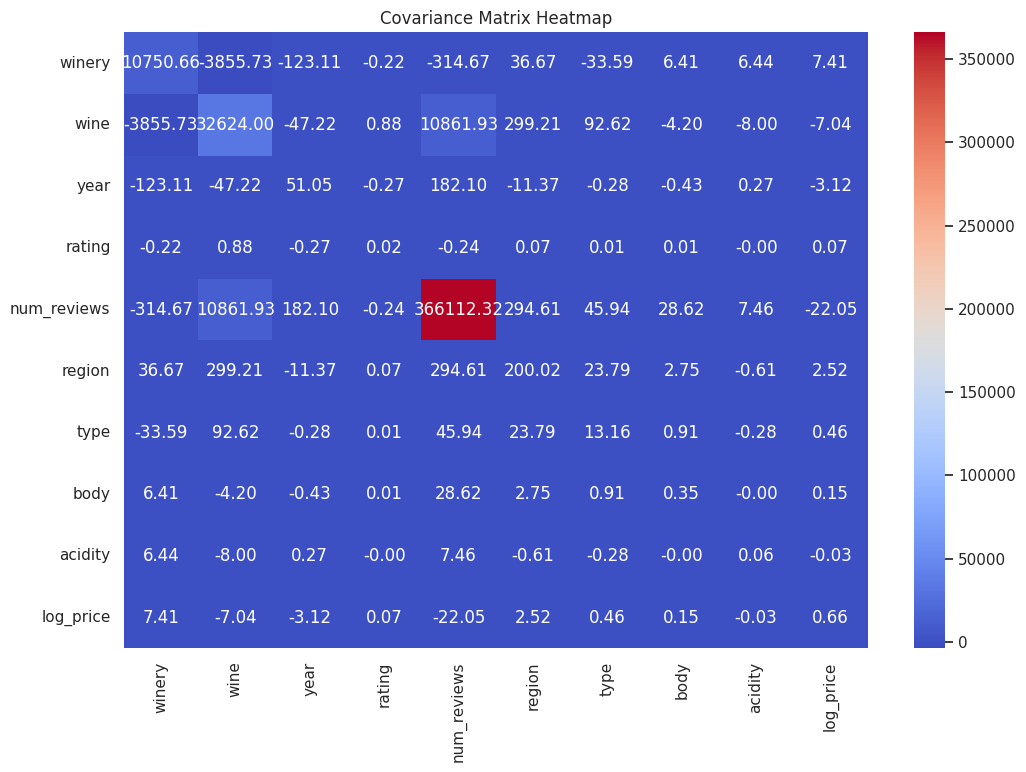

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'price' is the name of the target column
features = df.drop('price', axis=1)  # Exclude the target variable 'price'
cov_matrix = np.cov(features, rowvar=False)

# Create a heatmap
sns.set(style="white")  # Set the style of the heatmap
plt.figure(figsize=(12, 8))  # Set the size of the figure

# Create a heatmap using seaborn's heatmap function
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=features.columns, yticklabels=features.columns)

plt.title("Covariance Matrix Heatmap")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame and 'target' is the name of the target column

# Split the data into features and target
X = df.drop('price', axis=1)  # replace 'target' with the name of your target column
y = df['price']  # replace 'target' with the name of your target column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_rf = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse}")

# Optionally, you can also retrieve feature importances
feature_importances = model.feature_importances_
print(f"Feature Importances: {feature_importances}")


Mean Squared Error: 246.33214261349045
Feature Importances: [2.77498294e-04 4.87433413e-05 8.11195567e-05 2.43992952e-05
 1.34618436e-03 1.49277850e-05 2.06180821e-05 1.35853262e-05
 2.09752990e-07 9.98172714e-01]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame and 'target' is the name of the target column

# Split the data into features and target
X = df.drop('price', axis=1)  # replace 'target' with the name of your target column
y = df['price']  # replace 'target' with the name of your target column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can also retrieve the regression coefficients
coefficients = model.coef_
print(f"Coefficients: {coefficients}")

# And the intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")


Mean Squared Error: 14137.399492946759
Coefficients: [-6.45483531e-02  9.84432832e-02 -1.31450206e-01  1.43100360e+02
 -6.33208200e-03 -6.59362832e-01 -6.44100390e-01 -9.66007056e+00
  6.35394682e+01  1.39829819e+02]
Intercept: -919.6091212445144


In [ ]:
#Data is ready
# Split the data into test, train and validation
import pandas as pd
from sklearn.model_selection import train_test_split
columns_to_drop = ['log_price', 'price']
df.head()
X = df.drop(columns_to_drop, axis=1)
y = df['log_price']

# Y
# Assuming you have a DataFrame 'df' and you want to split it into train, test, and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = df.drop('price', axis=1)
X = X.drop('log_price', axis=1)
y = df['price']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)

# Print the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print(coefficients)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Print the predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Print the predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

       Feature  Coefficient
0       winery    -3.179690
1         wine     5.900496
2         year   -41.140309
3       rating    78.429242
4  num_reviews    -5.570973
5       region     1.412513
6         type     1.826026
7         body     8.295099
8      acidity     9.182497
      Actual   Predicted
3294   19.98   19.892915
3246   24.45   -1.521830
6701   17.50   22.847741
5426   18.90    9.315821
3788   77.36   12.777542
...      ...         ...
5492   48.96   -5.756823
3443   61.94   50.093762
4640   28.53   40.004318
2134   51.35   47.494654
961   106.00  132.175672

[1214 rows x 2 columns]
      Actual   Predicted
3294   19.98   19.892915
3246   24.45   -1.521830
6701   17.50   22.847741
5426   18.90    9.315821
3788   77.36   12.777542
...      ...         ...
5492   48.96   -5.756823
3443   61.94   50.093762
4640   28.53   40.004318
2134   51.35   47.494654
961   106.00  132.175672

[1214 rows x 2 columns]
Mean Squared Error: 20541.746457134268


In [ ]:
X_train

,winery,wine,year,rating,num_reviews,region,type,body,acidity
4746,270,248,2017,4.2,390,22,10,4.0,3.0
1633,52,575,2019,4.3,53,31,10,4.0,3.0
5427,124,541,2011,4.2,420,19,10,4.0,3.0
3244,131,487,2016,4.2,392,48,12,4.0,3.0
4438,304,144,2014,4.2,404,43,9,4.0,3.0
...,...,...,...,...,...,...,...,...,...
5058,72,155,2015,4.2,412,46,11,5.0,3.0
4190,313,395,2011,4.2,402,48,12,4.0,3.0
7372,270,248,2017,4.2,390,22,10,4.0,3.0
5434,371,275,2011,4.2,410,46,11,5.0,3.0


In [ ]:
y_val

5470    2.818995
6407    2.820188
1494    3.199081
6303    3.175968
7043    3.891004
          ...   
4182    2.608598
7346    2.818995
5244    2.994732
6013    4.348470
3523    3.454106
Name: log_price, Length: 486, dtype: float64

Run random forest and find optimmal parameters to get optimized MSE and R squared value

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred_val = model.predict(X_val)

mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print('Validation Mean Squared Error:', mse_val)
print('Validation R^2 Score:', r2_val)

Validation Mean Squared Error: 0.07463436320277021
Validation R^2 Score: 0.8728356020383748


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
y_pred_test = grid_search.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('Testing Mean Squared Error:', mse_test)
print('Testing R^2 Score:', r2_test)

Testing Mean Squared Error: 0.09345707195027612
Testing R^2 Score: 0.8670129807750689


Run backward stepwise selection method to find best features for feature selection

In [ ]:
feature_indices = np.arange(X_train.shape[1])
selected_features = list(range(X_train.shape[1]))
best_mse = mse_test
best_model = None
print(feature_indices)
for _ in range(X_train.shape[1]):
    feature_to_remove = None

    for feature_index in feature_indices:
        # Temporarily remove one feature
        temp_selected_features = selected_features.copy()
        temp_selected_features.remove(feature_index)
        # Train a model with the remaining features
        temp_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        temp_model.fit(X_train.iloc[:, temp_selected_features], y_train)
        y_pred = temp_model.predict(X_test.iloc[:, temp_selected_features])
        temp_mse = mean_squared_error(y_test, y_pred)

        # Check if removing the feature improved model performance
        if temp_mse < best_mse:
            best_mse = temp_mse
            feature_to_remove = feature_index
            best_model = temp_model

    # If removing a feature improves performance, update the selected features
    if feature_to_remove is not None:
        selected_features.remove(feature_to_remove)
        feature_indices = np.delete(feature_indices, np.where(feature_indices == feature_to_remove))

    else:
        # No more improvement can be made by removing features
        break

# The selected_features list now contains the indices of the features to keep
selected_feature_names = X.columns[selected_features]
print("Selected features:", selected_feature_names.tolist())
print("Best MSE:", best_mse)


[0 1 2 3 4 5 6 7 8]
Selected features: ['winery', 'wine', 'year', 'rating', 'type', 'body', 'acidity']
Best MSE: 0.08635959009888311


Rank the best features based on importance

In [ ]:
feature_importances = best_model.feature_importances_
column_names = X.columns[selected_features]
feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

   Feature  Importance
3   rating    0.464976
2     year    0.232828
0   winery    0.190835
1     wine    0.070112
4     type    0.030059
5     body    0.007948
6  acidity    0.003242


In [ ]:
df['price'].max()
df['price'].min()


6.26

Linear Regression

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame and 'target' is the name of the target column

# Split the data into features and target
X = df.drop('price', axis=1)  # replace 'target' with the name of your target column
y = df['price']  # replace 'target' with the name of your target column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can also retrieve the regression coefficients
coefficients = model.coef_
print(f"Coefficients: {coefficients}")

# And the intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")


Mean Squared Error: 14137.399492946759
Coefficients: [-6.45483531e-02  9.84432832e-02 -1.31450206e-01  1.43100360e+02
 -6.33208200e-03 -6.59362832e-01 -6.44100390e-01 -9.66007056e+00
  6.35394682e+01  1.39829819e+02]
Intercept: -919.6091212445144


In [ ]:
X

,winery,wine,year,rating,num_reviews,region,type,body,acidity,log_price
0,344,607,2013,4.9,58,58,19,5.0,3.0,6.902743
1,28,653,2018,4.9,31,61,18,4.0,2.0,5.747799
2,366,622,2009,4.8,1793,46,11,5.0,3.0,5.783671
3,366,622,1999,4.8,1705,46,11,5.0,3.0,6.540972
4,366,622,1996,4.8,1309,46,11,5.0,3.0,6.656804
...,...,...,...,...,...,...,...,...,...,...
7495,131,487,2016,4.2,392,48,12,4.0,3.0,2.994732
7496,130,349,2018,4.2,390,43,9,4.0,3.0,2.818995
7497,270,248,2017,4.2,390,22,10,4.0,3.0,3.196630
7498,254,275,2011,4.2,389,46,11,5.0,3.0,4.166665


In [ ]:
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity,log_price
0,344,607,2013,4.9,58,58,995.00,19,5.0,3.0,6.902743
1,28,653,2018,4.9,31,61,313.50,18,4.0,2.0,5.747799
2,366,622,2009,4.8,1793,46,324.95,11,5.0,3.0,5.783671
3,366,622,1999,4.8,1705,46,692.96,11,5.0,3.0,6.540972
4,366,622,1996,4.8,1309,46,778.06,11,5.0,3.0,6.656804
...,...,...,...,...,...,...,...,...,...,...,...
7495,131,487,2016,4.2,392,48,19.98,12,4.0,3.0,2.994732
7496,130,349,2018,4.2,390,43,16.76,9,4.0,3.0,2.818995
7497,270,248,2017,4.2,390,22,24.45,10,4.0,3.0,3.196630
7498,254,275,2011,4.2,389,46,64.50,11,5.0,3.0,4.166665
